In [1]:
# Assignment 3 file initialize

'''
Submitter : JESOON KANG, 20170937 Dept.of CSE

Data : 2019. 10. 9

Assignment 3.



Binary classification based on 3 layers neural network

'''



'\nSubmitter : JESOON KANG, 20170937 Dept.of CSE\n\nData : 2019. 10. 9\n\nAssignment 3.\n\n\n\nBinary classification based on 3 layers neural network\n\n'

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os



In [3]:

#### Section 1. #### This Section is bringed Data_import_ex.py file.

# Image Data import & resize

transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

#train_data_path = 'relative path of training data set'
train_data_path = '../data/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = '../data/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

#### Section 1 END ####



In [93]:
#### Section 2 START ####
# This Part includes Sigmoid, Hypothesis, Loss, Predict Functions

# sigmoid Function.
def sigmoid(z) :
    return 1 / (1 + math.e ** -z)

In [8]:
# predict Function. if h(x) returns >=0.5, set to 1. other cases, set to 0.
def predict(h, labels) :
    mount = len(h)
    correct = 0
    
    for i in range(0,mount) :
        if h[i] >= 0.5 :
            if labels[i] == 1 :
                correct +=1
        else :
            if labels[i] == 0 :
                correct +=1
    return correct * (1/mount)

#### Section 2 END ####

In [10]:
#### Section 3 START ####
# Section 3 includes Data Pre-processing. ReDesign datasets to easy calculate

# Data reconstruct. vectorize

# Each Image file will be stored shape of a row
training_vectorized = []
training_labels = []

validation_vectorized = []
validation_labels = []


# Training data vectorizing
for i, data in enumerate(trainloader) :
    train_data = []
    inputs, labels = data

    for u in inputs :
        for col in u[0] :
            train_data += list(col)
    training_vectorized.append(train_data)
    training_labels.append([labels])

training_vectorized = np.array(training_vectorized)
training_labels = np.array(training_labels)

# Validation data vectorizing
for i, data in enumerate(valloader) :
    val_data = []
    inputs, labels = data
    for u in inputs :
        for col in u[0] :
            val_data += list(col)
    validation_vectorized.append(val_data)
    validation_labels.append([labels])
validation_vectorized = np.array(validation_vectorized)
validation_labels = np.array(validation_labels)

#### Section 3 END ####


# log variables setting : to record statements
log_training_loss = []
log_validation_loss = []
log_iter = []
log_training_acc = []
log_validation_acc = []



In [36]:
#### Section 4 START ####
# This Part includes declaring variables which will be used in train & predict & result visualization

# Initial Weight Value


input_X = training_vectorized
target_Y = training_labels




In [156]:
def get_acc_of_list(yhat,target_Y) :
    count = 0
    for a,b in zip(yhat,target_Y) :
        if (a >= 0.5) :
            if b == 1 :
                count +=1
        else :
            if b == 0 :
                count +=1
    return count / len(yhat)
def is_correct(yhat,t) :
    if yhat >= 0.5 :
        if t == 1 :
            return 1
        else :
            return 0
    else :
        if t == 0 :
            return 1
        else :
            return 0 
            
def get_loss(yhat,t) :
    
    return -(t/yhat - (1-t)/(1-yhat))
    #return ((-t+0.1) * np.log(yhat+0.1) - (1-t+0.1) * np.log(1-yhat+0.1))

def sigmoid_der(x) :
    return sigmoid(x)*(1-sigmoid(x))

def get_error(yhat,t) :
    return 0.5* ((t-yhat)**2)

u = np.zeros((10000,50))
v = np.zeros((50,10))
w = np.zeros((10,1))
a = np.ones((50,1))
b = np.ones((10,1))
c = np.ones((1,1))

# Learning rate 
learning_rate = 0.01
log_loss = []
log_acc = []
log_iter = []
def propagate(input_X,target_Y,u,v,w,a,b,c, num_epoch) :

    
    data_size = len(input_X)
    prev_loss = 0.0
    
    for i in range(0,num_epoch) :
        Loss_epoch = 10
        yhat_list = []
        acc = []
        for x,t in zip(input_X,target_Y) :
            x = x.reshape((10000,1))
            z_1 = np.dot(u.T,x) + a
            out_1 = sigmoid(z_1) # 150,1

            z_2 = np.dot(v.T,out_1) + b
            out_2 = sigmoid(z_2) # 50,1

            z_3 = np.dot(w.T,out_2) + c
            #print(np.sum(z_3))
            yhat = sigmoid(np.sum(z_3))
            #print(yhat)
            yhat_list.append(yhat)
            acc.append(is_correct(yhat,t))


            # BackPropagation. Gradient Decent Calculate
            
            error_3 = -(np.divide(t,yhat) - np.divide(1-t, 1-yhat))
            
            d_z_3 = error_3 * sigmoid_der(z_3)
            d_w_3 = np.matmul(d_z_3, out_2.T) / out_2.shape[1]
            d_b_3 = np.sum(d_z_3,keepdims=True,axis=1) / out_2.shape[1]
            
            error_2 = np.matmul(w,d_z_3)
            
            d_z_2 = error_2* sigmoid_der(z_2)
            d_w_2 = np.matmul(d_z_2,out_1.T) / out_1.shape[1]
            d_b_2 = np.sum(d_z_2, axis=1, keepdims=True) / out_1.shape[1]
            
            error_1 = np.matmul(v,d_z_2)
            
            d_z_1 = error_1 * sigmoid_der(z_1)
            d_w_1 = np.matmul(d_z_1,x.T) / x.shape[1]
            d_b_1 = np.sum(d_z_1, axis=1, keepdims=True) / x.shape[1]
            
            
            
            w = w - learning_rate* d_w_3
            c = c - d_b_3
            
            v = v - learning_rate* d_w_2.T
            b = b - d_b_2
            
            u = u - learning_rate*np.dot(x,z_1.T)
            
      
            #print(get_loss(yhat,t))
            tmp = get_loss(yhat,t)
            if not math.isnan(tmp) :
                Loss_epoch = Loss_epoch + get_loss(yhat,t)
            #print(get_loss(yhat,t))
        print(Loss_epoch+100)
        print("Loss: ", Loss_epoch+100/data_size)
        
        print("                     Acc : ", np.array(acc).mean())
        log_loss.append(Loss_epoch/data_size)
        log_acc.append(np.array(acc).mean())
        log_iter.append(i)
    print("Complete")
    
propagate(input_X,target_Y,u,v,w,a,b,c,50)


/usr/local/var/pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


[353.67953026]
Loss:  [253.77690125]
                     Acc :  0.48490749756572543
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc :  0.48685491723466406
110
Loss:  10.097370983446933
                     Acc : 

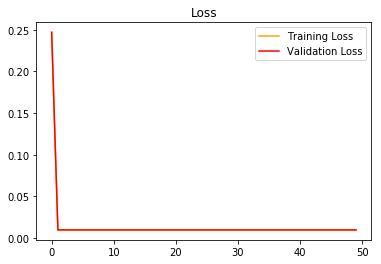

In [157]:
#### Section 5 ####
# Data Visualization


t1 = plt.plot(log_iter,log_loss, color='orange',label='Training Loss')
t2 = plt.plot(log_iter,log_loss, color= 'red',label='Validation Loss')
plt.title("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.show()



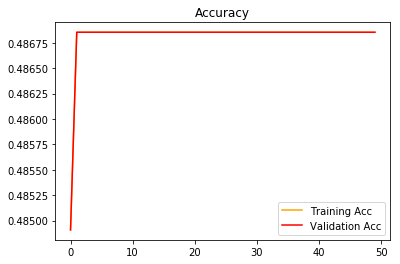

In [158]:
t1 = plt.plot(log_iter,log_acc, color='orange',label='Training Acc')
t2 = plt.plot(log_iter,log_acc, color= 'red',label='Validation Acc')
plt.title("Accuracy")
plt.legend(['Training Acc','Validation Acc'])
plt.show()